In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

# import scikit learn
from sklearn import datasets, linear_model, metrics

#import pandas_datareader.data as pdweb
#from pandas_datareader.data import DataReader
#from datetime import datetime
#from io import StringIO

In [2]:
nba = pd.read_csv('../data/NBA_train.csv')
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


In [3]:
nba.info()  #FGA = field goal attempted.  The attempt count will always be higher than the successful count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 20 columns):
SeasonEnd    835 non-null int64
Team         835 non-null object
Playoffs     835 non-null int64
W            835 non-null int64
PTS          835 non-null int64
oppPTS       835 non-null int64
FG           835 non-null int64
FGA          835 non-null int64
2P           835 non-null int64
2PA          835 non-null int64
3P           835 non-null int64
3PA          835 non-null int64
FT           835 non-null int64
FTA          835 non-null int64
ORB          835 non-null int64
DRB          835 non-null int64
AST          835 non-null int64
STL          835 non-null int64
BLK          835 non-null int64
TOV          835 non-null int64
dtypes: int64(19), object(1)
memory usage: 130.5+ KB


In [4]:
tab = nba.groupby(['W', 'Playoffs']).size()
print(tab)

W   Playoffs
11  0            2
12  0            2
13  0            2
14  0            2
15  0           10
16  0            2
17  0           11
18  0            5
19  0           10
20  0           10
21  0           12
22  0           11
23  0           11
24  0           18
25  0           11
26  0           17
27  0           10
28  0           18
29  0           12
30  0           19
    1            1
31  0           15
    1            1
32  0           12
33  0           17
34  0           16
35  0           13
    1            3
36  0           17
    1            4
                ..
44  0            2
    1           27
45  0            3
    1           22
46  0            1
    1           15
47  1           28
48  0            1
    1           14
49  1           17
50  1           32
51  1           12
52  1           20
53  1           17
54  1           18
55  1           24
56  1           16
57  1           23
58  1           13
59  1           14
60  1            8

In [5]:
pd.pivot_table(nba, index=['W'], values=['Team'], columns = ['Playoffs'], aggfunc='count',fill_value=0)

Team    
Playoffs    0   1
W                
11          2   0
12          2   0
13          2   0
14          2   0
15         10   0
16          2   0
17         11   0
18          5   0
19         10   0
20         10   0
21         12   0
22         11   0
23         11   0
24         18   0
25         11   0
26         17   0
27         10   0
28         18   0
29         12   0
30         19   1
31         15   1
32         12   0
33         17   0
34         16   0
35         13   3
36         17   4
37         15   4
38          8   7
39         10  10
40          9  13
41         11  26
42          8  29
43          2  18
44          2  27
45          3  22
46          1  15
47          0  28
48          1  14
49          0  17
50          0  32
51          0  12
52          0  20
53          0  17
54          0  18
55          0  24
56          0  16
57          0  23
58          0  13
59          0  14
60          0   8
61          0  10
62          0  13
63          0   7
64          0   3
65          0   3
66          0   2
67          0   4
69          0   1
72          0   1

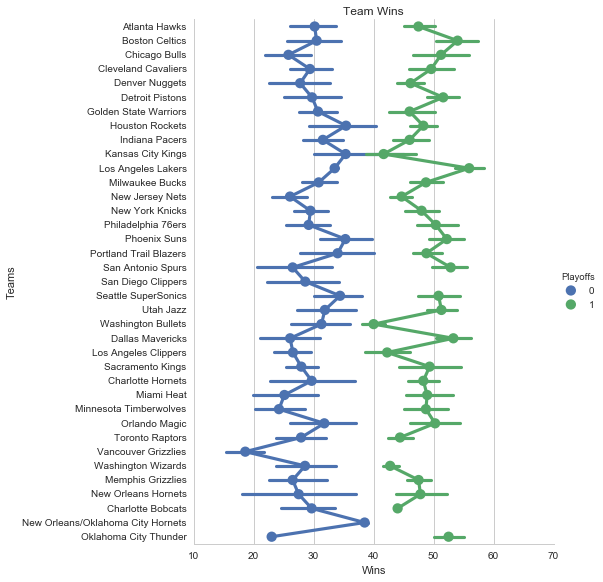

In [6]:
sns.factorplot('W', 'Team', data=nba, kind='point', fit_reg=False, hue="Playoffs", size=8)
plt.title('Team Wins')
plt.xlabel('Wins')
plt.ylabel('Teams')

In [7]:
nba['PTSdiff']=nba['PTS']-nba['oppPTS']

In [8]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,...,422,1907,2449,1227,2457,2198,809,308,1539,639
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,...,275,2019,2592,1115,2465,2152,704,392,1684,-222
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,...,187,1702,2205,1307,2381,2108,764,342,1370,28
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,...,255,1871,2539,1311,2524,2079,746,404,1533,-362


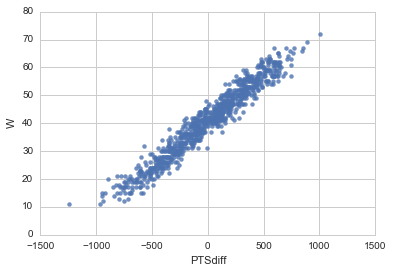

In [9]:
sns.regplot('PTSdiff','W',data=nba,scatter=True,fit_reg=False)

In [10]:
# Looks like linear regression is gonna be a good way to predict Wins from PTSdiff

WinsReg = smf.ols(formula='W ~ PTSdiff', data=nba).fit()
WinsReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:26:58   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     41.0000      0.106    387.027      0.000        40.792    41.208
PTSdiff        0.0326      0.000    116.681      0.000         0.032     0.033
==============================================================================
Omnibus:                        0.985   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.946
Skew:                           0.082   Prob(JB):                        0.623
Kurtosis:                       3.006   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# So the regression equation is:   W = 41 + (0.0326)*(PTSdiff)
# Remember, the team wants to win at least 42 games to have a good chance of making playoffs
# So if W = 42, then PTSdiff must be at least 30.67.

In [12]:
# Column names can't start with a number. Python throws a fit.  R doesn't like it either. So rename the columns to start with a letter.

nba.columns.values[9]='twoPA'
nba.columns.values[11]='threePA'
nba.columns.values

array(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', 'twoPA', '3P', 'threePA', 'FT', 'FTA', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'TOV', 'PTSdiff'], dtype=object)

In [13]:
nba.columns = ['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', 'twoPA', '3P', 'threePA', 'FT', 'FTA', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'TOV', 'PTSdiff']
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,twoPA,...,threePA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,...,422,1907,2449,1227,2457,2198,809,308,1539,639
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,...,275,2019,2592,1115,2465,2152,704,392,1684,-222
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,...,187,1702,2205,1307,2381,2108,764,342,1370,28
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,...,255,1871,2539,1311,2524,2079,746,404,1533,-362


In [14]:
# Another way to rename dataframe columns is to use "rename" method.

nba.rename(columns = {'2P':'twoP'}, inplace = True)
nba.rename(columns = {'3P':'threeP'}, inplace = True)

In [15]:
# Now that our column names are clean, let's build a model to predict Points Scored.

PointsReg = smf.ols(formula='PTS ~ twoPA + threePA + FTA + AST + ORB + DRB + TOV + STL + BLK',data=nba).fit()
PointsReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:26:59   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2050.8108    203.487    -10.078      0.000     -2450.223 -1651.398
twoPA          1.0429      0.030     35.274      0.000         0.985     1.101
threePA        1.2586      0.038     32.747      0.000         1.183     1.334
FTA            1.1280      0.034     33.440      0.000         1.062     1.194
AST            0.8858      0.044     20.150      0.000         0.799     0.972
ORB           -0.9554      0.078    -12.261      0.000        -1.108    -0.802
DRB            0.0388      0.062      0.631      0.528        -0.082     0.160
TOV           -0.0248      0.061     -0.405      0.686        -0.145     0.095
STL           -0.1992      0.092     -2.169      0.030        -0.379    -0.019
BLK           -0.0558      0.088     -0.635      0.526        -0.228     0.117
==============================================================================
Omnibus:                        1.265   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.301
Skew:                          -0.094   Prob(JB):                        0.522
Kurtosis:                       2.951   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# DRB, TOV, and BLK include 0 in the confidence interval. So these predictors aren't significant. Drop them?
# Now calculate residuals

SSE = sum(PointsReg.resid**2)
print(SSE)

28394313.9948


In [22]:
RMSE = np.sqrt(SSE/len(nba)) # where n is the number of rows in our dataset.
print(RMSE)

184.404898147


In [18]:
nba['PTS'].mean()

8370.239520958085

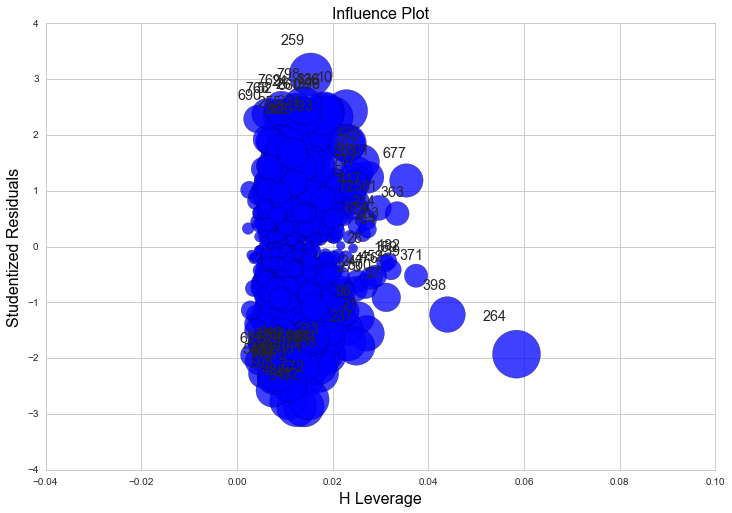

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(PointsReg, ax=ax, criterion="cooks")

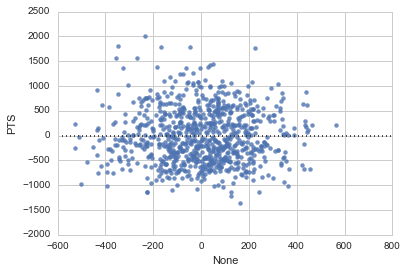

In [57]:
sns.residplot(PointsReg.resid, nba['PTS'])

#### R-squared = explained differences
#### R-squared of 1.0000 means all points are on the line. There's no error. All explained. Good.

In [24]:
# Now let's remove some useless predictors from the model. Let's remove TOV

PointsReg2 = smf.ols(formula='PTS ~ twoPA + threePA + FTA + AST + ORB + DRB + STL + BLK',data=nba).fit()
PointsReg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     920.4
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:31:10   Log-Likelihood:                -5541.2
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     826   BIC:                         1.114e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2076.6782    193.084    -10.755      0.000     -2455.672 -1697.684
twoPA          1.0435      0.030     35.366      0.000         0.986     1.101
threePA        1.2627      0.037     34.099      0.000         1.190     1.335
FTA            1.1254      0.033     34.023      0.000         1.060     1.190
AST            0.8861      0.044     20.173      0.000         0.800     0.972
ORB           -0.9582      0.078    -12.350      0.000        -1.110    -0.806
DRB            0.0389      0.062      0.632      0.527        -0.082     0.160
STL           -0.2068      0.090     -2.301      0.022        -0.383    -0.030
BLK           -0.0586      0.087     -0.670      0.503        -0.230     0.113
==============================================================================
Omnibus:                        1.258   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.296
Skew:                          -0.093   Prob(JB):                        0.523
Kurtosis:                       2.950   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Now let's remove some more useless predictors from the model. Let's remove DRB

PointsReg3 = smf.ols(formula='PTS ~ twoPA + threePA + FTA + AST + ORB + STL + BLK',data=nba).fit()
PointsReg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1053.
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:31:59   Log-Likelihood:                -5541.4
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     827   BIC:                         1.114e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2015.4630    167.009    -12.068      0.000     -2343.274 -1687.652
twoPA          1.0483      0.029     36.753      0.000         0.992     1.104
threePA        1.2708      0.035     36.568      0.000         1.203     1.339
FTA            1.1285      0.033     34.506      0.000         1.064     1.193
AST            0.8909      0.043     20.597      0.000         0.806     0.976
ORB           -0.9702      0.075    -12.903      0.000        -1.118    -0.823
STL           -0.2276      0.084     -2.724      0.007        -0.392    -0.064
BLK           -0.0388      0.082     -0.475      0.635        -0.199     0.121
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.208
Skew:                          -0.090   Prob(JB):                        0.546
Kurtosis:                       2.948   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Now let's remove some more useless predictors from the model. Let's remove BLK

PointsReg4 = smf.ols(formula='PTS ~ twoPA + threePA + FTA + AST + ORB + STL',data=nba).fit()
PointsReg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1229.
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:32:35   Log-Likelihood:                -5541.5
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     828   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2032.7164    162.942    -12.475      0.000     -2352.544 -1712.889
twoPA          1.0500      0.028     37.117      0.000         0.994     1.105
threePA        1.2731      0.034     37.001      0.000         1.206     1.341
FTA            1.1273      0.033     34.581      0.000         1.063     1.191
AST            0.8884      0.043     20.701      0.000         0.804     0.973
ORB           -0.9743      0.075    -13.051      0.000        -1.121    -0.828
STL           -0.2268      0.084     -2.717      0.007        -0.391    -0.063
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.222
Skew:                          -0.089   Prob(JB):                        0.543
Kurtosis:                       2.942   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
SSE_4 = sum(PointsReg4.resid**2)
print(SSE_4)

28421464.8626


In [30]:
RMSE_4 = np.sqrt(SSE_4/len(nba)) # where n is the number of rows in our dataset.
print(RMSE_4)

184.493041793


## Now we need to predict 2012 & 2013, so we need to load nba_Test (not Train).

In [31]:
NBA_Test = pd.read_csv('../data/NBA_test.csv')
NBA_Test[:5]

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149


In [34]:
nba.columns.values

array(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       'twoP', 'twoPA', 'threeP', 'threePA', 'FT', 'FTA', 'ORB', 'DRB',
       'AST', 'STL', 'BLK', 'TOV', 'PTSdiff'], dtype=object)

In [36]:
NBA_Test['PTSdiff']=NBA_Test['PTS']-NBA_Test['oppPTS']
NBA_Test.columns = ['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       'twoP', 'twoPA', 'threeP', 'threePA', 'FT', 'FTA', 'ORB', 'DRB',
       'AST', 'STL', 'BLK', 'TOV', 'PTSdiff']

In [37]:
PointsPredictions = PointsReg4.predict(NBA_Test)

In [53]:
PointsReg4.pvalues()

TypeError: 'Series' object is not callable

In [46]:
# Our in-sample R squared was 0.899
# Now let's compute out-of-sample R squared
SSEz = sum((PointsPredictions - NBA_Test['PTS'])**2)
SSTz = sum((np.mean(NBA_Test['PTS'])-NBA_Test['PTS'])**2)
R_squared = 1 - (SSEz/SSTz)
print(R_squared)  # This should read 0.8127

0.651897523497


In [43]:
RMSEz = np.sqrt(SSEz/len(NBA_Test))
print(RMSEz)  # This should read 196.3723

196.372343964


In [44]:
np.mean(NBA_Test['PTS'])  # This should read 8061.8214

8061.821428571428

In [45]:
(np.mean(NBA_Test['PTS'])-NBA_Test['PTS'])

0      29.821429
1     117.821429
2     400.821429
3     420.821429
4     148.821429
5    -231.178571
6    -642.178571
7     283.821429
8    -234.178571
9    -626.178571
10   -227.178571
11   -319.178571
12    402.821429
13   -374.178571
14    -46.178571
15    210.821429
16    347.821429
17   -134.178571
18   -607.178571
19    343.821429
20    421.821429
21    256.821429
22     66.821429
23   -157.178571
24   -386.178571
25     90.821429
26     23.821429
27    417.821429
Name: PTS, dtype: float64